# The Problem  
## Input
The Cleveland database consists of 13 features that a related to the condition of the heart.

> 1. **age**: age in years
> 2. **sex**: (1 = male; 0 = female) 
> 3. **cp**: chest pain type (4 values)
> 4. **trestbps**: resting blood pressure
> 5. **chol**: serum cholestoral in mg/dl
> 6. **fbs**: fasting blood sugar > 120 mg/dl
> 7. **restecg**: resting electrocardiographic results (values 0,1,2)
> 8. **thalach**: maximum heart rate achieved
> 9. **exang**: exercise induced angina
> 10. **oldpeak**: ST depression induced by exercise relative to rest
> 11. **slope**: the slope of the peak exercise ST segment
> 12. **ca**: number of major vessels (0-3) colored by flourosopy
> 13. **thal**: 3 = normal; 6 = fixed defect; 7 = reversable defect
## Output
Given these 13 features, the goal is to predict if a heart disease is present (the 14th variable of the database). 

# Motivation
This year my father had a heart attack. He was lucky that a cardiologist was present at the hospital. Hence, the heart attack was diagnosed correctly pretty fast and he was operated on quickly. However, normally the cardiologist would not have been there at this time and consequently the diagnosis would have taken far longer. It was clear to me that this task has to be automated by a machine learning algorithm. So I did a quick research and found the Cleveland database on Kaggle. My goal is to predict the presence of a heart disease given the features of the database. 
Let's go!

# Loading th data

In [174]:
%matplotlib inline

#import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import fbeta_score, make_scorer, accuracy_score, precision_score, recall_score

In [2]:
#loading data
data = pd.read_csv('heart.csv')
#swap target variable
data["target"] = data["target"]==0

# Analyzing the data
## Taking a quick glance

In [3]:
# get shape of dataframe
data.shape

(303, 14)

In [4]:
# quick glance at the data
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,False
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,False
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,False
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,False
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,False


In [5]:
# get most important statistics of variables 
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


The data consists of 303 observations with 13 features and a label. 

- Numerical features: age, trestbps, chol, thalach, oldpeak, ca
- Ordinal categorical: cp
- Nominal categorical: sex, fbs, restecg, exang, slope, thal
- Binary categgorical: sex, fbs, exang

There are no missing or unknown values. 

## In depth analysis of variables and relations
### Target variable

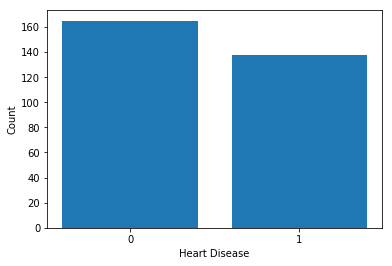

In [6]:
plt.bar(data["target"].value_counts().index, data["target"].value_counts())
plt.xticks(data["target"].unique())
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.show()

In [7]:
data["target"].mean()

0.45544554455445546

45% of the patients suffer from a heart disease. But be careful! The population of the sample are patients in a hospital. This is only a small biased subset of the world population. So we can not infer that 45% of all citizens suffer from a heart disease. 

### Age

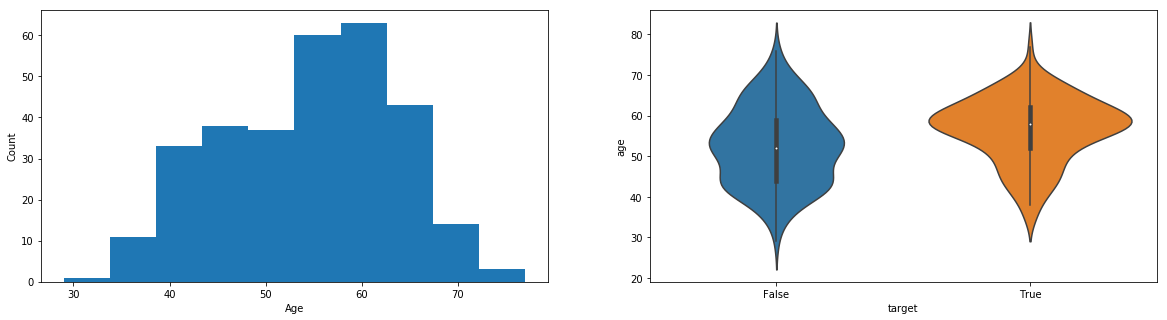

In [8]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.hist(data["age"])
plt.xlabel("Age")
plt.ylabel("Count")
plt.subplot(122)
sns.violinplot(data["target"], data["age"])
plt.show()

In [9]:
data["age"].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [10]:
data.loc[data["target"]==1, "age"].describe()

count    138.000000
mean      56.601449
std        7.962082
min       35.000000
25%       52.000000
50%       58.000000
75%       62.000000
max       77.000000
Name: age, dtype: float64

In [11]:
data.loc[data["target"]==0, "age"].describe()

count    165.000000
mean      52.496970
std        9.550651
min       29.000000
25%       44.000000
50%       52.000000
75%       59.000000
max       76.000000
Name: age, dtype: float64

The average age of the patients of this sample is 54. The youngest patient is 29 years old, while the oldest patient is 77 years old. The age is pretty normal distributed and the distribution looks symmetric. Further it is unimodal with a modus of about 60 and 55. As we can see from the mean and the violinplot, patients with a heart disease are on average 4 years older. Further the standard deviation tells us that the age varies less among patients with a heart disease. 

### Sex

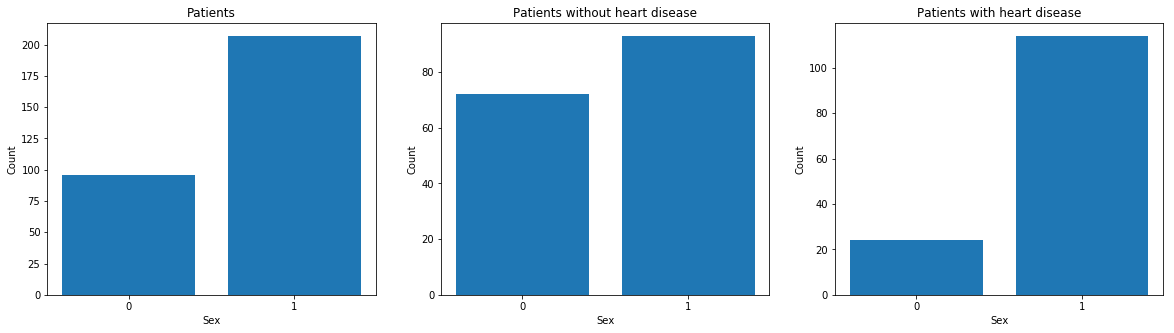

In [12]:
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.bar(data["sex"].value_counts().index, data["sex"].value_counts())
plt.xticks(data["sex"].unique())
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Patients")
plt.subplot(132)
plt.bar(data.loc[data["target"]==0,"sex"].value_counts().index, data.loc[data["target"]==0,"sex"].value_counts())
plt.xticks(data["sex"].unique())
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Patients without heart disease")
plt.subplot(133)
plt.bar(data.loc[data["target"]==1,"sex"].value_counts().index, data.loc[data["target"]==1,"sex"].value_counts())
plt.xticks(data["sex"].unique())
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Patients with heart disease")
plt.show()

In [13]:
data["sex"].mean()

0.6831683168316832

In [14]:
data.loc[data["target"]==0,"sex"].mean()

0.5636363636363636

In [15]:
data.loc[data["target"]==1,"sex"].mean()

0.8260869565217391

68% of all patients in the sample are male. In the subset of all patients without a heart disease 56% are male, while in the subset of all patients with a heart disease 83% are male. Hence, in this sample the propability of a male patient to have a heart disease is higher than the propability of a female patient. 

### Chest pain type

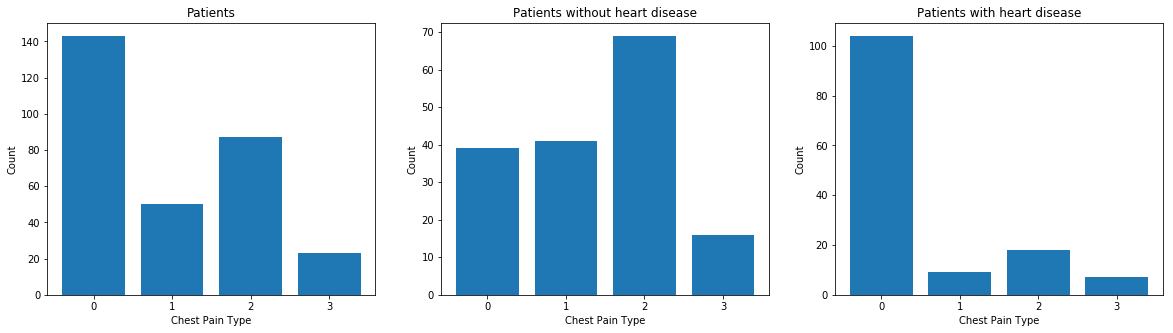

In [16]:
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.bar(data["cp"].value_counts().index, data["cp"].value_counts())
plt.xticks(data["cp"].unique())
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.title("Patients")
plt.subplot(132)
plt.bar(data.loc[data["target"]==0,"cp"].value_counts().index, data.loc[data["target"]==0,"cp"].value_counts())
plt.xticks(data["cp"].unique())
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.title("Patients without heart disease")
plt.subplot(133)
plt.bar(data.loc[data["target"]==1,"cp"].value_counts().index, data.loc[data["target"]==1,"cp"].value_counts())
plt.xticks(data["cp"].unique())
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.title("Patients with heart disease")
plt.show()

In [17]:
data["cp"].value_counts() / len(data["cp"]) * 100

0    47.194719
2    28.712871
1    16.501650
3     7.590759
Name: cp, dtype: float64

In [18]:
data.loc[data["target"]==0,"cp"].value_counts() / len(data.loc[data["target"]==0,"cp"]) * 100

2    41.818182
1    24.848485
0    23.636364
3     9.696970
Name: cp, dtype: float64

In [19]:
data.loc[data["target"]==1,"cp"].value_counts() / len(data.loc[data["target"]==1,"cp"]) * 100

0    75.362319
2    13.043478
1     6.521739
3     5.072464
Name: cp, dtype: float64

Almost half of the patients do not have chest pain. If they have chest pain, it is mostly type 2. In the subset of the patients with a heart disease the proportion of patients without chest pain is even bigger. Most of the patients without a heart disease have chest pain type 2. In this subset only roughly a quarter does not have chest pain.

### Resting blood pressure

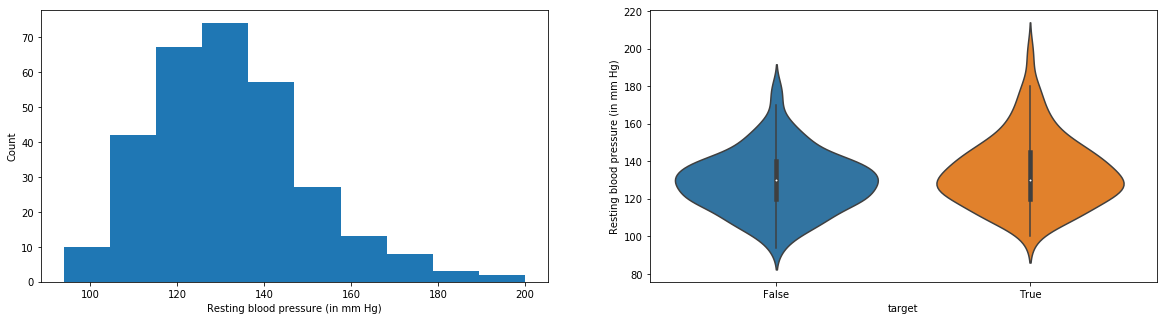

In [20]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.hist(data["trestbps"])
plt.xlabel("Resting blood pressure (in mm Hg)")
plt.ylabel("Count")
plt.subplot(122)
sns.violinplot(data["target"], data["trestbps"])
plt.ylabel("Resting blood pressure (in mm Hg)")
plt.show()

In [21]:
data["trestbps"].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [22]:
data.loc[data["target"]==0, "trestbps"].describe()

count    165.000000
mean     129.303030
std       16.169613
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      180.000000
Name: trestbps, dtype: float64

In [23]:
data.loc[data["target"]==1, "trestbps"].describe()

count    138.000000
mean     134.398551
std       18.729944
min      100.000000
25%      120.000000
50%      130.000000
75%      144.750000
max      200.000000
Name: trestbps, dtype: float64

The average blood pressure of all patients is 132mmhg. The distribution is pretty normel and unimodel. However, since it is a bit right skewed, it is not perfectly symmetric. The average blood pressure of patients without a heart disease is a tiny bit lower and the distribution has less variance and is less right skewed. 

### Serum cholestoral

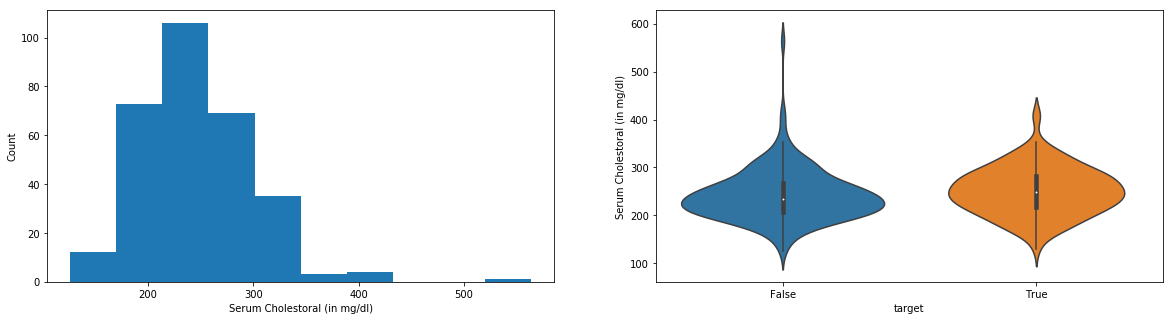

In [24]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.hist(data["chol"])
plt.xlabel("Serum Cholestoral (in mg/dl)")
plt.ylabel("Count")
plt.subplot(122)
sns.violinplot(data["target"], data["chol"])
plt.ylabel("Serum Cholestoral (in mg/dl)")
plt.show()

In [25]:
data["chol"].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

In [26]:
data.loc[data["target"]==0, "chol"].describe()

count    165.000000
mean     242.230303
std       53.552872
min      126.000000
25%      208.000000
50%      234.000000
75%      267.000000
max      564.000000
Name: chol, dtype: float64

In [27]:
data.loc[data["target"]==1, "chol"].describe()

count    138.000000
mean     251.086957
std       49.454614
min      131.000000
25%      217.250000
50%      249.000000
75%      283.000000
max      409.000000
Name: chol, dtype: float64

The mean serum cholestoral of all patients is 246 mg/dl. It is pretty normaly distributed and unimodal. But the distribution is a bit right skewed with a maximum outlier of **564 mg/dl**. The mean does not differ much between patients with and without a heart disease. However, patients without a heart disease tend to have a bit lower serum cholestoral. The violinplot shows us, that among patients without a heart disease, there are more outliers with very high serum cholestoral.

### Fasting blood sugar

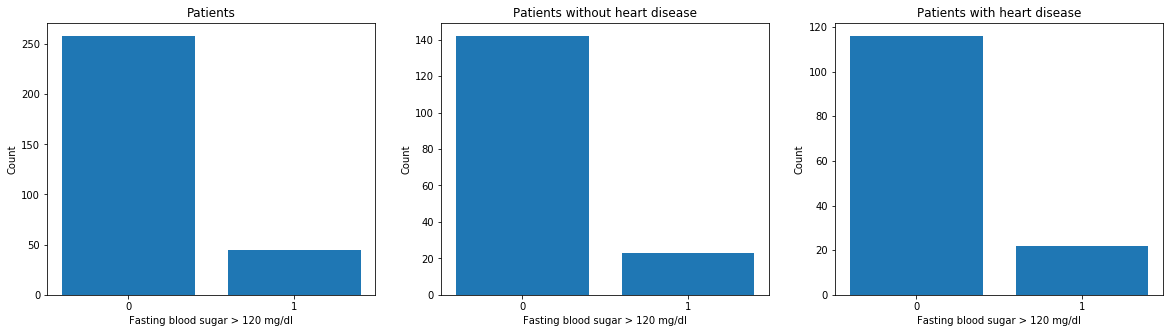

In [28]:
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.bar(data["fbs"].value_counts().index, data["fbs"].value_counts())
plt.xticks(data["fbs"].unique())
plt.xlabel("Fasting blood sugar > 120 mg/dl")
plt.ylabel("Count")
plt.title("Patients")
plt.subplot(132)
plt.bar(data.loc[data["target"]==0,"fbs"].value_counts().index, data.loc[data["target"]==0,"fbs"].value_counts())
plt.xticks(data["fbs"].unique())
plt.xlabel("Fasting blood sugar > 120 mg/dl")
plt.ylabel("Count")
plt.title("Patients without heart disease")
plt.subplot(133)
plt.bar(data.loc[data["target"]==1,"fbs"].value_counts().index, data.loc[data["target"]==1,"fbs"].value_counts())
plt.xticks(data["fbs"].unique())
plt.xlabel("Fasting blood sugar > 120 mg/dl")
plt.ylabel("Count")
plt.title("Patients with heart disease")
plt.show()

In [29]:
data["fbs"].mean()

0.1485148514851485

In [30]:
data.loc[data["target"]==0,"fbs"].mean()

0.1393939393939394

In [31]:
data.loc[data["target"]==1,"fbs"].mean()

0.15942028985507245

15% of all patients have a fasting blood sugar greater then 120 mg/dl. The proportion of patients with a heart disease is 16%, while the proportion of patients without a heart disease is 14%. Hence, the proportion of patients with a fasting blood sugar greater then 120 mg/dl is a bit higher among patients with a heart disease.  

### Resting electrocardiographic results

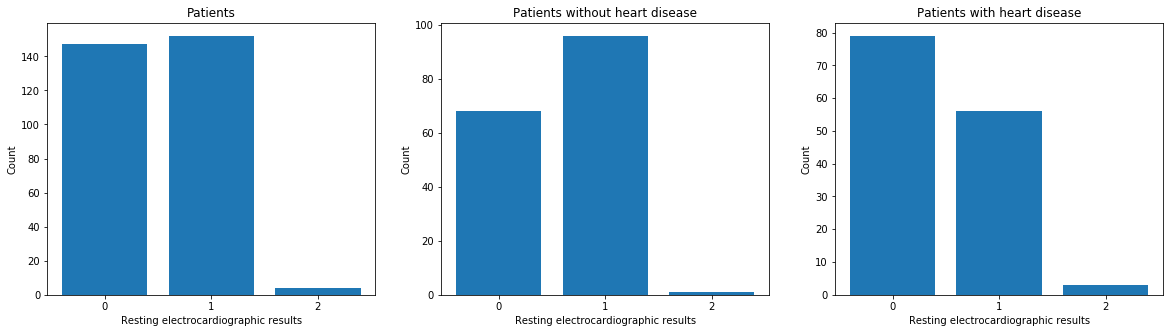

In [32]:
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.bar(data["restecg"].value_counts().index, data["restecg"].value_counts())
plt.xticks(data["restecg"].unique())
plt.xlabel("Resting electrocardiographic results")
plt.ylabel("Count")
plt.title("Patients")
plt.subplot(132)
plt.bar(data.loc[data["target"]==0,"restecg"].value_counts().index, data.loc[data["target"]==0,"restecg"].value_counts())
plt.xticks(data["restecg"].unique())
plt.xlabel("Resting electrocardiographic results")
plt.ylabel("Count")
plt.title("Patients without heart disease")
plt.subplot(133)
plt.bar(data.loc[data["target"]==1,"restecg"].value_counts().index, data.loc[data["target"]==1,"restecg"].value_counts())
plt.xticks(data["restecg"].unique())
plt.xlabel("Resting electrocardiographic results")
plt.ylabel("Count")
plt.title("Patients with heart disease")
plt.show()

In [33]:
data["restecg"].value_counts() / len(data["restecg"]) * 100

1    50.165017
0    48.514851
2     1.320132
Name: restecg, dtype: float64

In [34]:
data.loc[data["target"]==0,"restecg"].value_counts() / len(data.loc[data["target"]==0,"restecg"]) * 100

1    58.181818
0    41.212121
2     0.606061
Name: restecg, dtype: float64

In [35]:
data.loc[data["target"]==1,"restecg"].value_counts() / len(data.loc[data["target"]==0,"restecg"]) * 100

0    47.878788
1    33.939394
2     1.818182
Name: restecg, dtype: float64

Among all patients the proportion of electrocardiographic result 0 and 1 is rougly the same. Only about 1% get the result 2. In the subset of all patients with a heart disease result 0 is more likely, while among all patients without a heart disease result 1 is more likely. 


### Maximum heart rate 

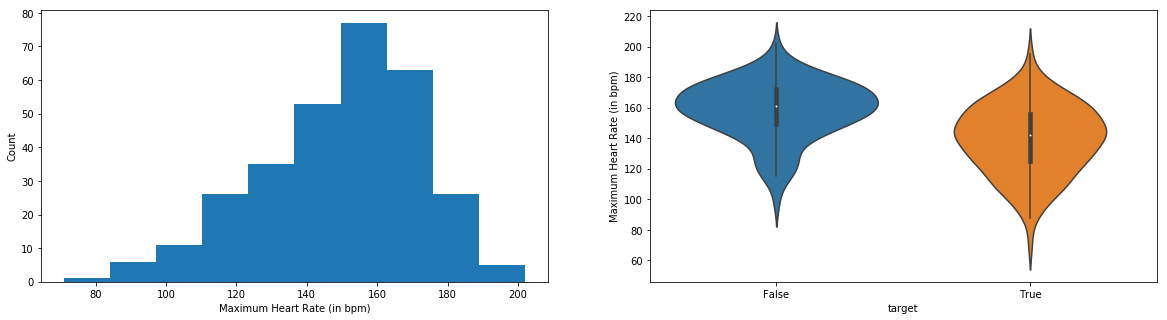

In [36]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.hist(data["thalach"])
plt.xlabel("Maximum Heart Rate (in bpm)")
plt.ylabel("Count")
plt.subplot(122)
sns.violinplot(data["target"], data["thalach"])
plt.ylabel("Maximum Heart Rate (in bpm)")
plt.show()

In [37]:
data["thalach"].describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

In [38]:
data.loc[data["target"]==0, "thalach"].describe()

count    165.000000
mean     158.466667
std       19.174276
min       96.000000
25%      149.000000
50%      161.000000
75%      172.000000
max      202.000000
Name: thalach, dtype: float64

In [39]:
data.loc[data["target"]==1, "thalach"].describe()

count    138.000000
mean     139.101449
std       22.598782
min       71.000000
25%      125.000000
50%      142.000000
75%      156.000000
max      195.000000
Name: thalach, dtype: float64

The average maximum heart rate of all patients is 150 bpm. The variables distribution look similar to a normal distribution and is unimodal. It is a bit left skewed. The average maximum heart rate of patients without a heart disease is on average roughly 20 bpm higher than the maximum heart rate of patients with a heart disease. The variance is a bit less. 

### Exercise induced angina 

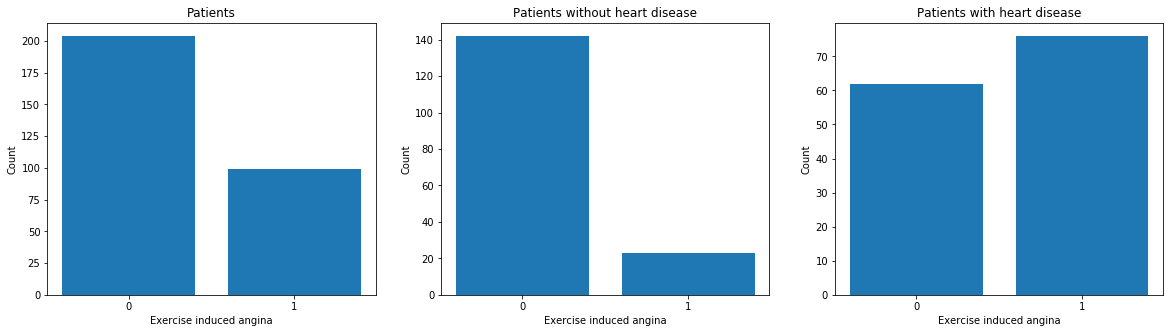

In [40]:
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.bar(data["exang"].value_counts().index, data["exang"].value_counts())
plt.xticks(data["exang"].unique())
plt.xlabel("Exercise induced angina")
plt.ylabel("Count")
plt.title("Patients")
plt.subplot(132)
plt.bar(data.loc[data["target"]==0,"exang"].value_counts().index, data.loc[data["target"]==0,"exang"].value_counts())
plt.xticks(data["exang"].unique())
plt.xlabel("Exercise induced angina")
plt.ylabel("Count")
plt.title("Patients without heart disease")
plt.subplot(133)
plt.bar(data.loc[data["target"]==1,"exang"].value_counts().index, data.loc[data["target"]==1,"exang"].value_counts())
plt.xticks(data["exang"].unique())
plt.xlabel("Exercise induced angina")
plt.ylabel("Count")
plt.title("Patients with heart disease")
plt.show()

In [41]:
data["exang"].value_counts() / len(data["exang"]) * 100

0    67.326733
1    32.673267
Name: exang, dtype: float64

In [42]:
data.loc[data["target"]==0, "exang"].value_counts() / len(data.loc[data["target"]==0, "exang"]) * 100

0    86.060606
1    13.939394
Name: exang, dtype: float64

In [43]:
data.loc[data["target"]==1, "exang"].value_counts() / len(data.loc[data["target"]==1, "exang"]) * 100

1    55.072464
0    44.927536
Name: exang, dtype: float64

For only 32% of all patients exercise did induce angina. However, for most of the patients with heart disease exercise induced angina. This is contrary to the patients without heart disease. The large majority of patients without heart disease did not have symptoms of angina while exercising. 

### ST depression induced by exercise relative to rest

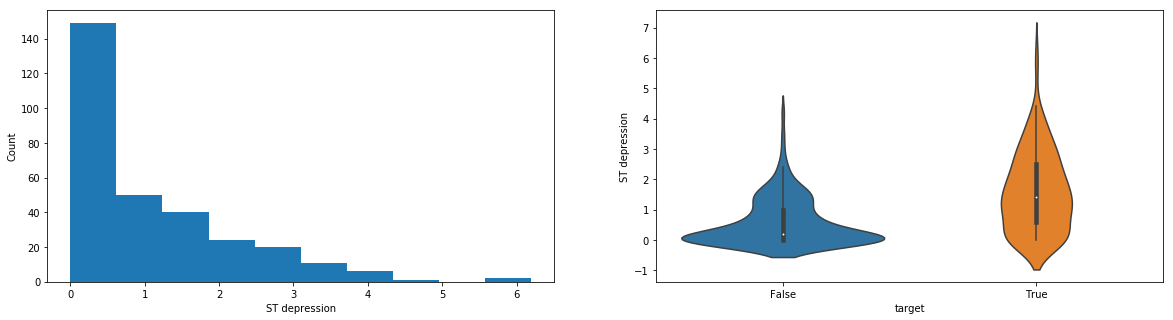

In [44]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.hist(data["oldpeak"])
plt.xlabel("ST depression")
plt.ylabel("Count")
plt.subplot(122)
sns.violinplot(data["target"], data["oldpeak"])
plt.ylabel("ST depression")
plt.show()

In [45]:
data["oldpeak"].describe()

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

In [46]:
data.loc[data["target"]==0, "oldpeak"].describe()

count    165.000000
mean       0.583030
std        0.780683
min        0.000000
25%        0.000000
50%        0.200000
75%        1.000000
max        4.200000
Name: oldpeak, dtype: float64

In [47]:
data.loc[data["target"]==1, "oldpeak"].describe()

count    138.000000
mean       1.585507
std        1.300340
min        0.000000
25%        0.600000
50%        1.400000
75%        2.500000
max        6.200000
Name: oldpeak, dtype: float64

The average st depression induced by exercise relative to rest is 1. The distribution is not normal and not symmetric. It is unimodal with a modus of 0. It is heavily right skewed with a maximum outlier of 6.2. The average st depression of patients without a heart disease is with 0.6 about a third of the average st depression of patients with a heart disease. Further the variance is smaller and the distribution is less right skewed. 

### Slope of the peak exercise ST segment

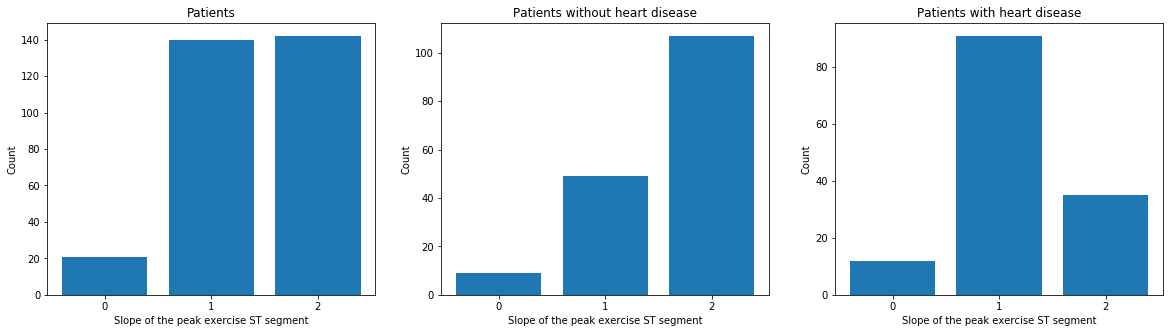

In [48]:
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.bar(data["slope"].value_counts().index, data["slope"].value_counts())
plt.xticks(data["slope"].unique())
plt.xlabel("Slope of the peak exercise ST segment")
plt.ylabel("Count")
plt.title("Patients")
plt.subplot(132)
plt.bar(data.loc[data["target"]==0,"slope"].value_counts().index, data.loc[data["target"]==0,"slope"].value_counts())
plt.xticks(data["slope"].unique())
plt.xlabel("Slope of the peak exercise ST segment")
plt.ylabel("Count")
plt.title("Patients without heart disease")
plt.subplot(133)
plt.bar(data.loc[data["target"]==1,"slope"].value_counts().index, data.loc[data["target"]==1,"slope"].value_counts())
plt.xticks(data["slope"].unique())
plt.xlabel("Slope of the peak exercise ST segment")
plt.ylabel("Count")
plt.title("Patients with heart disease")
plt.show()

In [49]:
data["slope"].value_counts() / len(data["slope"]) * 100

2    46.864686
1    46.204620
0     6.930693
Name: slope, dtype: float64

In [50]:
data.loc[data["target"]==0, "slope"].value_counts() / len(data.loc[data["target"]==0, "slope"]) * 100

2    64.848485
1    29.696970
0     5.454545
Name: slope, dtype: float64

In [51]:
data.loc[data["target"]==1, "slope"].value_counts() / len(data.loc[data["target"]==1, "slope"]) * 100

1    65.942029
2    25.362319
0     8.695652
Name: slope, dtype: float64

Among all patients a slope of 2 and 1 are equally likely in this sample. Only 7% of all patients have a slope of 0. 
In the subset of all patients with a heart disease a slope of 1 is way more likely than a slope of 2 while among all patients without a heart disease a slope of 2 is way more likely than a slope of 1. 

### Number of major vessels colored by flourosopy

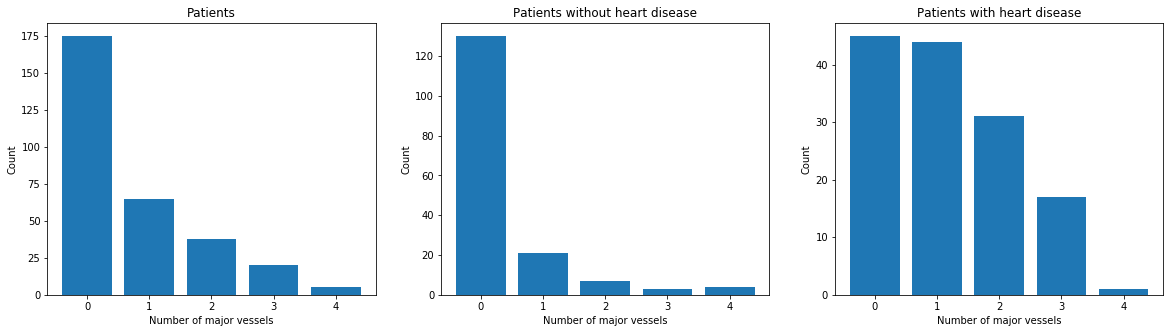

In [52]:
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.bar(data["ca"].value_counts().index, data["ca"].value_counts())
plt.xticks(data["ca"].unique())
plt.xlabel("Number of major vessels")
plt.ylabel("Count")
plt.title("Patients")
plt.subplot(132)
plt.bar(data.loc[data["target"]==0,"ca"].value_counts().index, data.loc[data["target"]==0,"ca"].value_counts())
plt.xticks(data["ca"].unique())
plt.xlabel("Number of major vessels")
plt.ylabel("Count")
plt.title("Patients without heart disease")
plt.subplot(133)
plt.bar(data.loc[data["target"]==1,"ca"].value_counts().index, data.loc[data["target"]==1,"ca"].value_counts())
plt.xticks(data["ca"].unique())
plt.xlabel("Number of major vessels")
plt.ylabel("Count")
plt.title("Patients with heart disease")
plt.show()

In [53]:
data["ca"].value_counts() / len(data["ca"]) * 100

0    57.755776
1    21.452145
2    12.541254
3     6.600660
4     1.650165
Name: ca, dtype: float64

In [54]:
data.loc[data["target"]==0, "ca"].value_counts() / len(data.loc[data["target"]==0, "ca"]) * 100

0    78.787879
1    12.727273
2     4.242424
4     2.424242
3     1.818182
Name: ca, dtype: float64

In [55]:
data.loc[data["target"]==1, "ca"].value_counts() / len(data.loc[data["target"]==1, "ca"]) * 100

0    32.608696
1    31.884058
2    22.463768
3    12.318841
4     0.724638
Name: ca, dtype: float64

For the majority of the patients no major vessels are colored by flourosopy. The higher the number major vessels colored by flourosopy, the less patients are in this category. Among all patients with a heart disease, the average number of vessels colored by flourosopy is much higher than the number of patients without a heart disease. Most of the patients without a heart disease do not have any vessels colored by flourosopy.

### Thallium Stress Tests

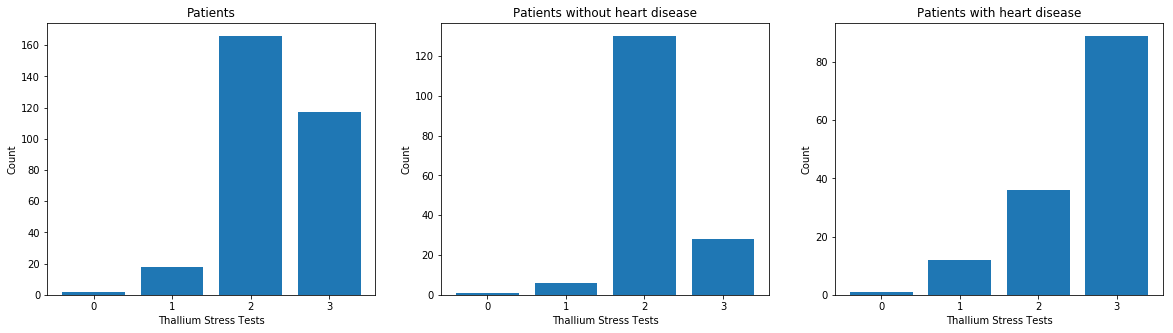

In [56]:
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.bar(data["thal"].value_counts().index, data["thal"].value_counts())
plt.xticks(data["thal"].unique())
plt.xlabel("Thallium Stress Tests")
plt.ylabel("Count")
plt.title("Patients")
plt.subplot(132)
plt.bar(data.loc[data["target"]==0,"thal"].value_counts().index, data.loc[data["target"]==0,"thal"].value_counts())
plt.xticks(data["thal"].unique())
plt.xlabel("Thallium Stress Tests")
plt.ylabel("Count")
plt.title("Patients without heart disease")
plt.subplot(133)
plt.bar(data.loc[data["target"]==1,"thal"].value_counts().index, data.loc[data["target"]==1,"thal"].value_counts())
plt.xticks(data["thal"].unique())
plt.xlabel("Thallium Stress Tests")
plt.ylabel("Count")
plt.title("Patients with heart disease")
plt.show()

In [57]:
data["thal"].value_counts() / len(data["thal"]) * 100

2    54.785479
3    38.613861
1     5.940594
0     0.660066
Name: thal, dtype: float64

In [58]:
data.loc[data["target"]==0, "thal"].value_counts() / len(data.loc[data["target"]==0, "thal"]) * 100

2    78.787879
3    16.969697
1     3.636364
0     0.606061
Name: thal, dtype: float64

In [59]:
data.loc[data["target"]==1, "thal"].value_counts() / len(data.loc[data["target"]==1, "thal"]) * 100

3    64.492754
2    26.086957
1     8.695652
0     0.724638
Name: thal, dtype: float64

Most of all patients get result 2. The proportion of result 3 is pretty high as well. Result 1 and 0 is very rare. For all patients without a heart disease the proportion of result 2 is even higher. Most of the patients with a heart disease get result 3. 

## Analysis of correlations

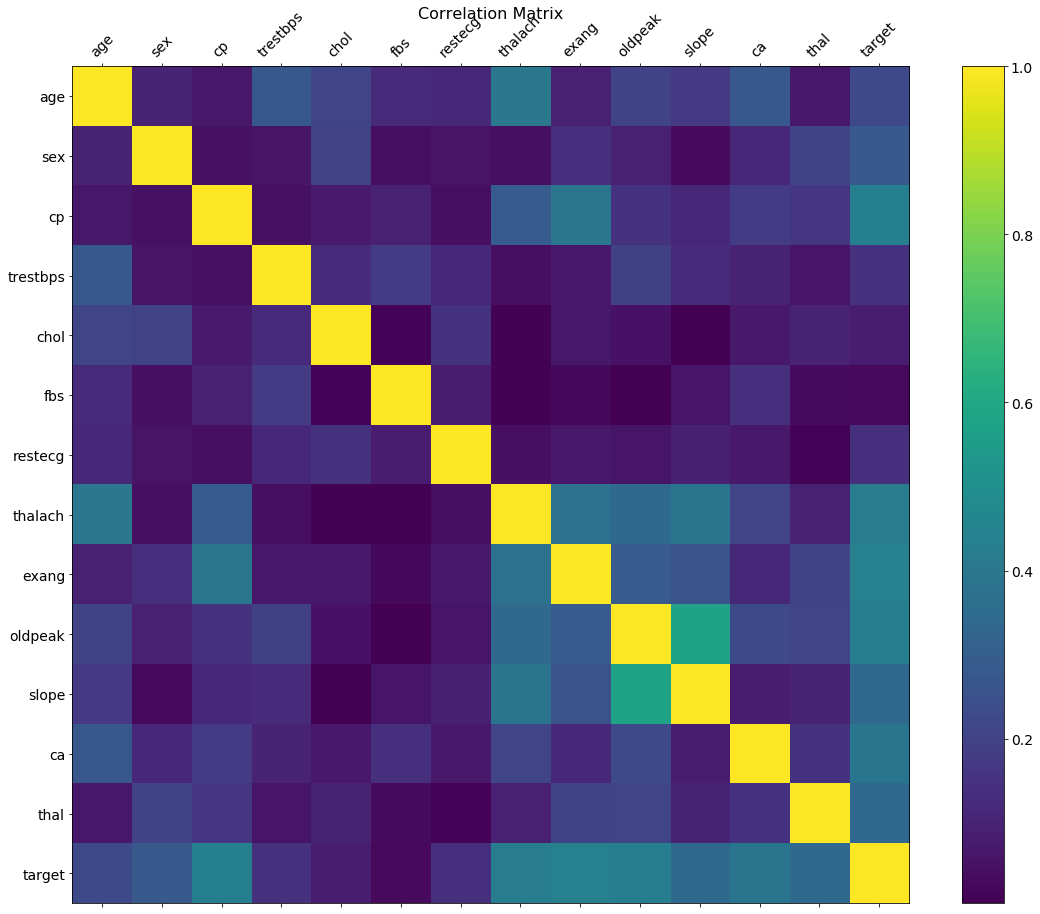

In [60]:
f = plt.figure(figsize=(19, 15))
plt.matshow(data.corr().apply(abs), fignum=f.number)
plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=45)
plt.yticks(range(data.shape[1]), data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

We can see that, **chest pain**, **angina** and **st depression** have the highest correlation with the **target** variable. This is a hint, that subjective feelings are really important to predict the presence of a heart disease. The **fasting blood sugar** has almost no correlation with the target variable. The correlation matrix shows us, that not all features are independent from each other. For example there is a pretty high correlation between the **st depression** and the **slope of the peak**. Further there is a high correlation between **angina** and **chest pain**. Maybe we can fuse those variables together with pca. 

## Feature selection

Since there is only a tiny correlation between the target variable and the fasting blood sugar, I will drop this variable. 

In [61]:
data.drop('fbs', axis=1, inplace=True)

## Dummy encoding

We have to turn the nominal categorical variables with multiple classes into binary variables. Therefore we have to use dummy encoding. 

In [79]:
features, labels = data.drop("target", axis=1), data["target"]

In [63]:
features_dummy = pd.get_dummies(features, columns=['restecg', 'slope', 'thal'], drop_first=True)

In [64]:
features_dummy.head()

,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,ca,restecg_1,restecg_2,slope_1,slope_2,thal_1,thal_2,thal_3
0,63,1,3,145,233,150,0,2.3,0,0,0,0,0,1,0,0
1,37,1,2,130,250,187,0,3.5,0,1,0,0,0,0,1,0
2,41,0,1,130,204,172,0,1.4,0,0,0,0,1,0,1,0
3,56,1,1,120,236,178,0,0.8,0,1,0,0,1,0,1,0
4,57,0,0,120,354,163,1,0.6,0,1,0,0,1,0,1,0


## Feature scaling

From the data analysis we know that st depression is pretty skewed. To deal with that we can take the log and look if the distribution then look normal. 

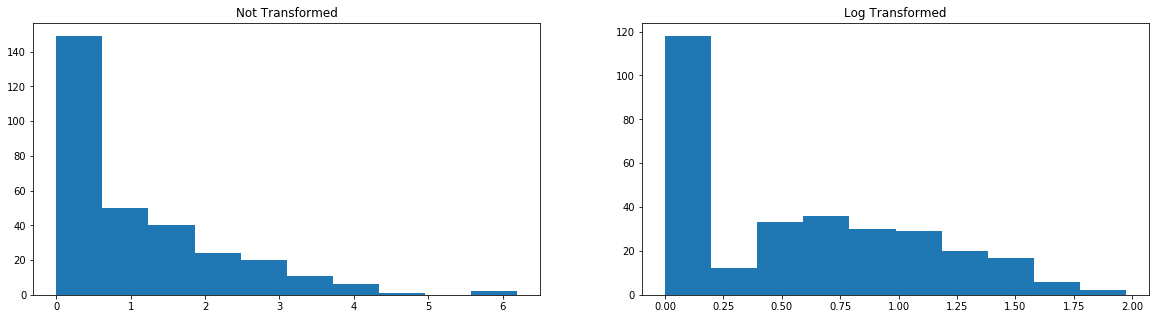

In [65]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.hist(features_dummy['oldpeak'])
plt.title("Not Transformed")
plt.subplot(1,2,2)
plt.hist(np.log(features_dummy["oldpeak"]+1))
plt.title("Log Transformed")
plt.show()

As we can see, log transforming the variable helps in making the distribution normal. Hence, we will apply log transform!

In [66]:
features_dummy["oldpeak_log"] = np.log(features_dummy["oldpeak"]+1)

In [67]:
features_dummy.drop('oldpeak', axis=1, inplace=True)

In [68]:
features_dummy.head()

,age,sex,cp,trestbps,chol,thalach,exang,ca,restecg_1,restecg_2,slope_1,slope_2,thal_1,thal_2,thal_3,oldpeak_log
0,63,1,3,145,233,150,0,0,0,0,0,0,1,0,0,1.193922
1,37,1,2,130,250,187,0,0,1,0,0,0,0,1,0,1.504077
2,41,0,1,130,204,172,0,0,0,0,0,1,0,1,0,0.875469
3,56,1,1,120,236,178,0,0,1,0,0,1,0,1,0,0.587787
4,57,0,0,120,354,163,1,0,1,0,0,1,0,1,0,0.470004


Further we want each variable having the same effect. Therefore standardizing the data makes a lot of sense. 


In [69]:
ss = StandardScaler()

In [70]:
features_ss = pd.DataFrame(ss.fit_transform(features_dummy), columns=features_dummy.columns)

/home/moritz/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/moritz/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [71]:
features_ss.head()

,age,sex,cp,trestbps,chol,thalach,exang,ca,restecg_1,restecg_2,slope_1,slope_2,thal_1,thal_2,thal_3,oldpeak_log
0,0.952197,0.681005,1.973123,0.763956,-0.256334,0.015443,-0.696631,-0.714429,-1.003306,-0.115663,-0.926766,-0.939142,3.979112,-1.100763,-0.793116,1.192005
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,1.633471,-0.696631,-0.714429,0.996705,-0.115663,-0.926766,-0.939142,-0.251312,0.908461,-0.793116,1.784504
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,0.977514,-0.696631,-0.714429,-1.003306,-0.115663,-0.926766,1.064802,-0.251312,0.908461,-0.793116,0.583653
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,1.239897,-0.696631,-0.714429,0.996705,-0.115663,-0.926766,1.064802,-0.251312,0.908461,-0.793116,0.034085
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,0.583939,1.435481,-0.714429,0.996705,-0.115663,-0.926766,1.064802,-0.251312,0.908461,-0.793116,-0.190919


## Data compression

The correlation matrix in the data analysis step showed us, that there are some strong relationships between the features. Therefore we might archieve some great results by compressing the data with pca. But first we have to estimate the number of components we want to use. 

In [72]:
#filling the list with explained variance ratio by components
exp_var = PCA(16).fit(features_ss).explained_variance_ratio_

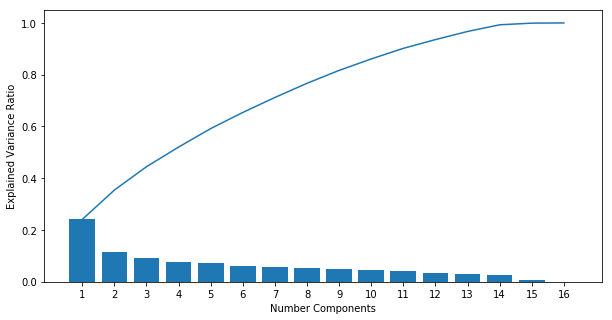

In [73]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(1,17,1), np.cumsum(exp_var))
plt.bar(np.arange(1,17,1), exp_var)
plt.xticks(np.arange(1,17,1))
plt.xlabel("Number Components")
plt.ylabel("Explained Variance Ratio")
plt.show()

The first components explain the majority of the variance. After the 5th component the ratio decreases slowly. Therefore I decided to work with 4 components

In [76]:
#compressing the data 
pca_4 = PCA(4)
features_compressed = pd.DataFrame(pca_4.fit_transform(features_ss))

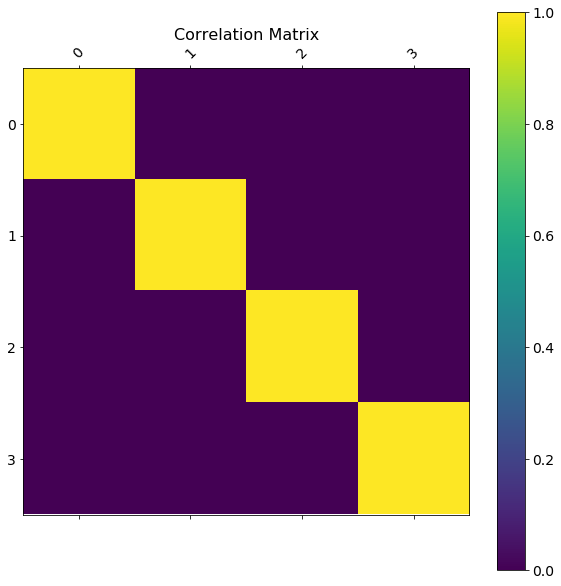

In [77]:
#plotting the correlation matrix
f = plt.figure(figsize=(10, 10))
plt.matshow(features_compressed.corr().apply(abs), fignum=f.number)
plt.xticks(range(features_compressed.shape[1]), features_compressed.columns, fontsize=14, rotation=45)
plt.yticks(range(features_compressed.shape[1]), features_compressed.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

As we can see in the correlation matrix the features are now independent. This is a assumption of many learning algorithms, so it is really important to fix this!

## Split the data 

Now I will split the data in:
- training set: 70%
- cross-validation set: 15%
- test set: 15%

In [85]:
features_train, features_validation, labels_train, labels_validation = train_test_split(features_compressed, labels, test_size=0.3, shuffle=True)

In [86]:
features_test, features_validation, labels_test, labels_validation = train_test_split(features_validation, labels_validation, test_size=0.5, shuffle=True)

## Fitting and evaluating models

### Logistic Regression
We will start with logistic regression as the classifier.
The regularization type will be 'l2'. 
We keep maximum iteration as the default(max_iter=100). 


We use Grid Search to estimate the following hyperparameters:
- **C**: Inverse of regularization strength
- **solver**: Algorithm to use in the optimization problem
As the evaluation metric we will use F2 score, because in medicine we do not want to have false negatives and therefore we want to weigh recall more than precision.  

In [121]:
# define possible parameter
grid_param = {'C':[0.01,0.05,0.1,0.5,1,5,10,50,100],
              'solver':['newton-cg','lbfgs','liblinear','sag','saga']}
scorer = make_scorer(fbeta_score, beta=2)
lr_clf = LogisticRegression() 
lrg_clf = GridSearchCV(lr_clf, grid_param, scoring=scorer, cv=5)

In [122]:
# fit models
lrg_clf = lrg_clf.fit(features_train, labels_train)

/home/moritz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [123]:
# get best model
lrg_clf.best_estimator_

LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [124]:
# get best score
lrg_clf.best_score_

0.8113338570101218

We could archieve the best F2-Score=0.81 with C=0.05 and 'liblinear' as the solver. 

In [125]:
lrg_preds = lrg_clf.predict(features_validation)

In [132]:
def evaluate(preds, labels):
    f2 = fbeta_score(preds, labels, beta=2)
    acc = accuracy_score(preds, labels)
    prec = precision_score(preds, labels)
    rec = recall_score(preds, labels)
    print("F2-Score: {}, Accuracy: {}, Precision: {}, Recall: {}".format(f2, acc, prec, rec))

In [133]:
evaluate(lrg_preds, labels_validation)

F2-Score: 0.9375, Accuracy: 0.9130434782608695, Precision: 0.875, Recall: 0.9545454545454546


Due to the smaller sample size we could archieve a even better F2-Score on the validation set. 
We have a accuracy of 91%, which means that 91% of the patients were correctly classified. Sinc we optimized for the F2-Score our recall is even better. The recall is 95%, which means, that 95% of all patients with a heart disease were classified as having a heart disease. Our precision is 88% and therefore a bit worse. 88%  of patients classified as having a heart disease do really have a heart disease. 

### Support Vector Machine 

We continue with support vector machine as a classifier.
We use the default 'rbf' kernel, because it is universal. 

Further let us estimate the penalty parameter **C** of the error term with Grid Search.

In [170]:
# define possible parameter
grid_param = {'C':[0.001,0.005,0.01,0.05,0.1,0.5,1,5,10,50,100],
              'kernel':['linear','poly','rbf','sigmoid']}
svm_clf = SVC(kernel='linear') 
svmg_clf = GridSearchCV(svm_clf, grid_param, scoring=scorer, cv=5)

In [171]:
# fit models
svmg_clf = svmg_clf.fit(features_train, labels_train)

/home/moritz/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/moritz/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/moritz/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/moritz/anaconda3/lib/python3.7/site-packages/skle

/home/moritz/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/moritz/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/moritz/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/moritz/anaconda3/lib/python3.7/site-packages/skle

/home/moritz/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/moritz/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/moritz/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/moritz/anaconda3/lib/python3.7/site-packages/skle

/home/moritz/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/moritz/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/moritz/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/moritz/anaconda3/lib/python3.7/site-packages/skle

/home/moritz/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/moritz/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/moritz/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/moritz/anaconda3/lib/python3.7/site-packages/skle

In [172]:
# get best model
svmg_clf.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [173]:
# get best score
svmg_clf.best_score_

0.8095469093777425

The best svm has a F2-Score of 81% and uses a linear kernel and C=1 as the penalty parameter for the error. 

In [162]:
svmg_preds = svmg_clf.predict(features_validation)

In [163]:
# get evaluation scores
evaluate(svmg_preds, labels_validation)

F2-Score: 0.875, Accuracy: 0.8695652173913043, Precision: 0.875, Recall: 0.875


The SVM archieved a F2-Score of 88% on the validation set. Since it has a accuracy of 0.87, 87% of the patients were classified correctly. Even though we optimized for the F2-Score, precision and recall have both the same value 0.88. This means 88% of all patients that were classified as having a heart disease do really have a heart disease. Further we can conclude that 88% of all patients, that have a heart disease, were also calssified as having a heart disease. 

## Adaptiv boosted decision trees

We will go on with a decision tree as a classificator. But instead of training just one decision tree, we will train an ensemble of decision trees. For that we will use a technique called adaptive boosting. We have many weak decision trees, that get trained on a random subset of the data and then they form a strong classifier by voting. Better weak classifiers have more votes. 

As the criterion for the decision tree we will use the **gini impurity** and we set the max depth to one.  
We use Grid Search to estimate the **maximum depth**, the **number of trees** and the **learning rate**.

In [191]:
# define possible parameter
grid_param = {'n_estimators':[1,3,10,15,20,30,50,75,100],
              'learning_rate':[0.001,0.005,0.01,0.05,0.1,0.5,1,1.5,2,3,4,5]}
ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1)) 
adag_clf = GridSearchCV(ada_clf, grid_param, scoring=scorer, cv=5)

In [192]:
adag_clf = adag_clf.fit(features_train, labels_train)

/home/moritz/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/moritz/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/moritz/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/moritz/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/moritz/anaconda3/lib/python3.7/site-packages/sklearn/m

/home/moritz/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/moritz/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/moritz/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/moritz/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/moritz/anaconda3/lib/python3.7/site-packages/sklearn/m

In [196]:
# get best model
adag_clf.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=3, n_estimators=75, random_state=None)

In [198]:
# get best score
adag_clf.best_score_

0.8159341428127976

The best decision tree ensemble has a F2-Score of 82%. The learning rate is 3 and the number of trees is 75.

In [199]:
adag_preds = adag_clf.predict(features_validation)

In [201]:
# get evaluation scores
evaluate(adag_preds, labels_validation)

F2-Score: 0.8333333333333334, Accuracy: 0.8260869565217391, Precision: 0.8333333333333334, Recall: 0.8333333333333334


With the ensemble of weak decision trees we archieved a F2-Score of 0.83. Further we have a accuracy of 83%, which means that we have classified 83% of the patients correctly. The precsion and the recall are both 83% even though we optimized for recall. Consequently 83% of all patients, that were classified as having a heart disease do really have a heart disease and 83% of all patients, that have a heart disease, were classified as having a heart disease. 